### 1. La televisión, los espectáculos de medio tiempo y el Gran Juego

Tanto si te gusta el fútbol como si no, la Super Bowl es un espectáculo. En la fiesta de la Super Bowl hay algo para todos. El drama en forma de reventones, remontadas y controversia para el aficionado al deporte. Están los anuncios ridículamente caros, algunos hilarantes, otros desgarradores, que invitan a la reflexión y son extraños. Los espectáculos de medio tiempo con los mayores músicos del mundo, a veces montados en tigres mecánicos gigantes o saltando desde el techo del estadio. Es un espectáculo. Y en este cuaderno vamos a averiguar cómo interactúan algunos de los elementos de este espectáculo. Después de explorar y limpiar un poco nuestros datos, vamos a responder a preguntas como

- ¿Cuáles son los resultados más extremos del juego?
- ¿Cómo afecta el juego a la audiencia televisiva?
- ¿Cómo han evolucionado la audiencia, los índices de audiencia de la televisión y el coste de los anuncios a lo largo del tiempo?
- ¿Quiénes son los músicos más prolíficos en cuanto a actuaciones en el descanso?

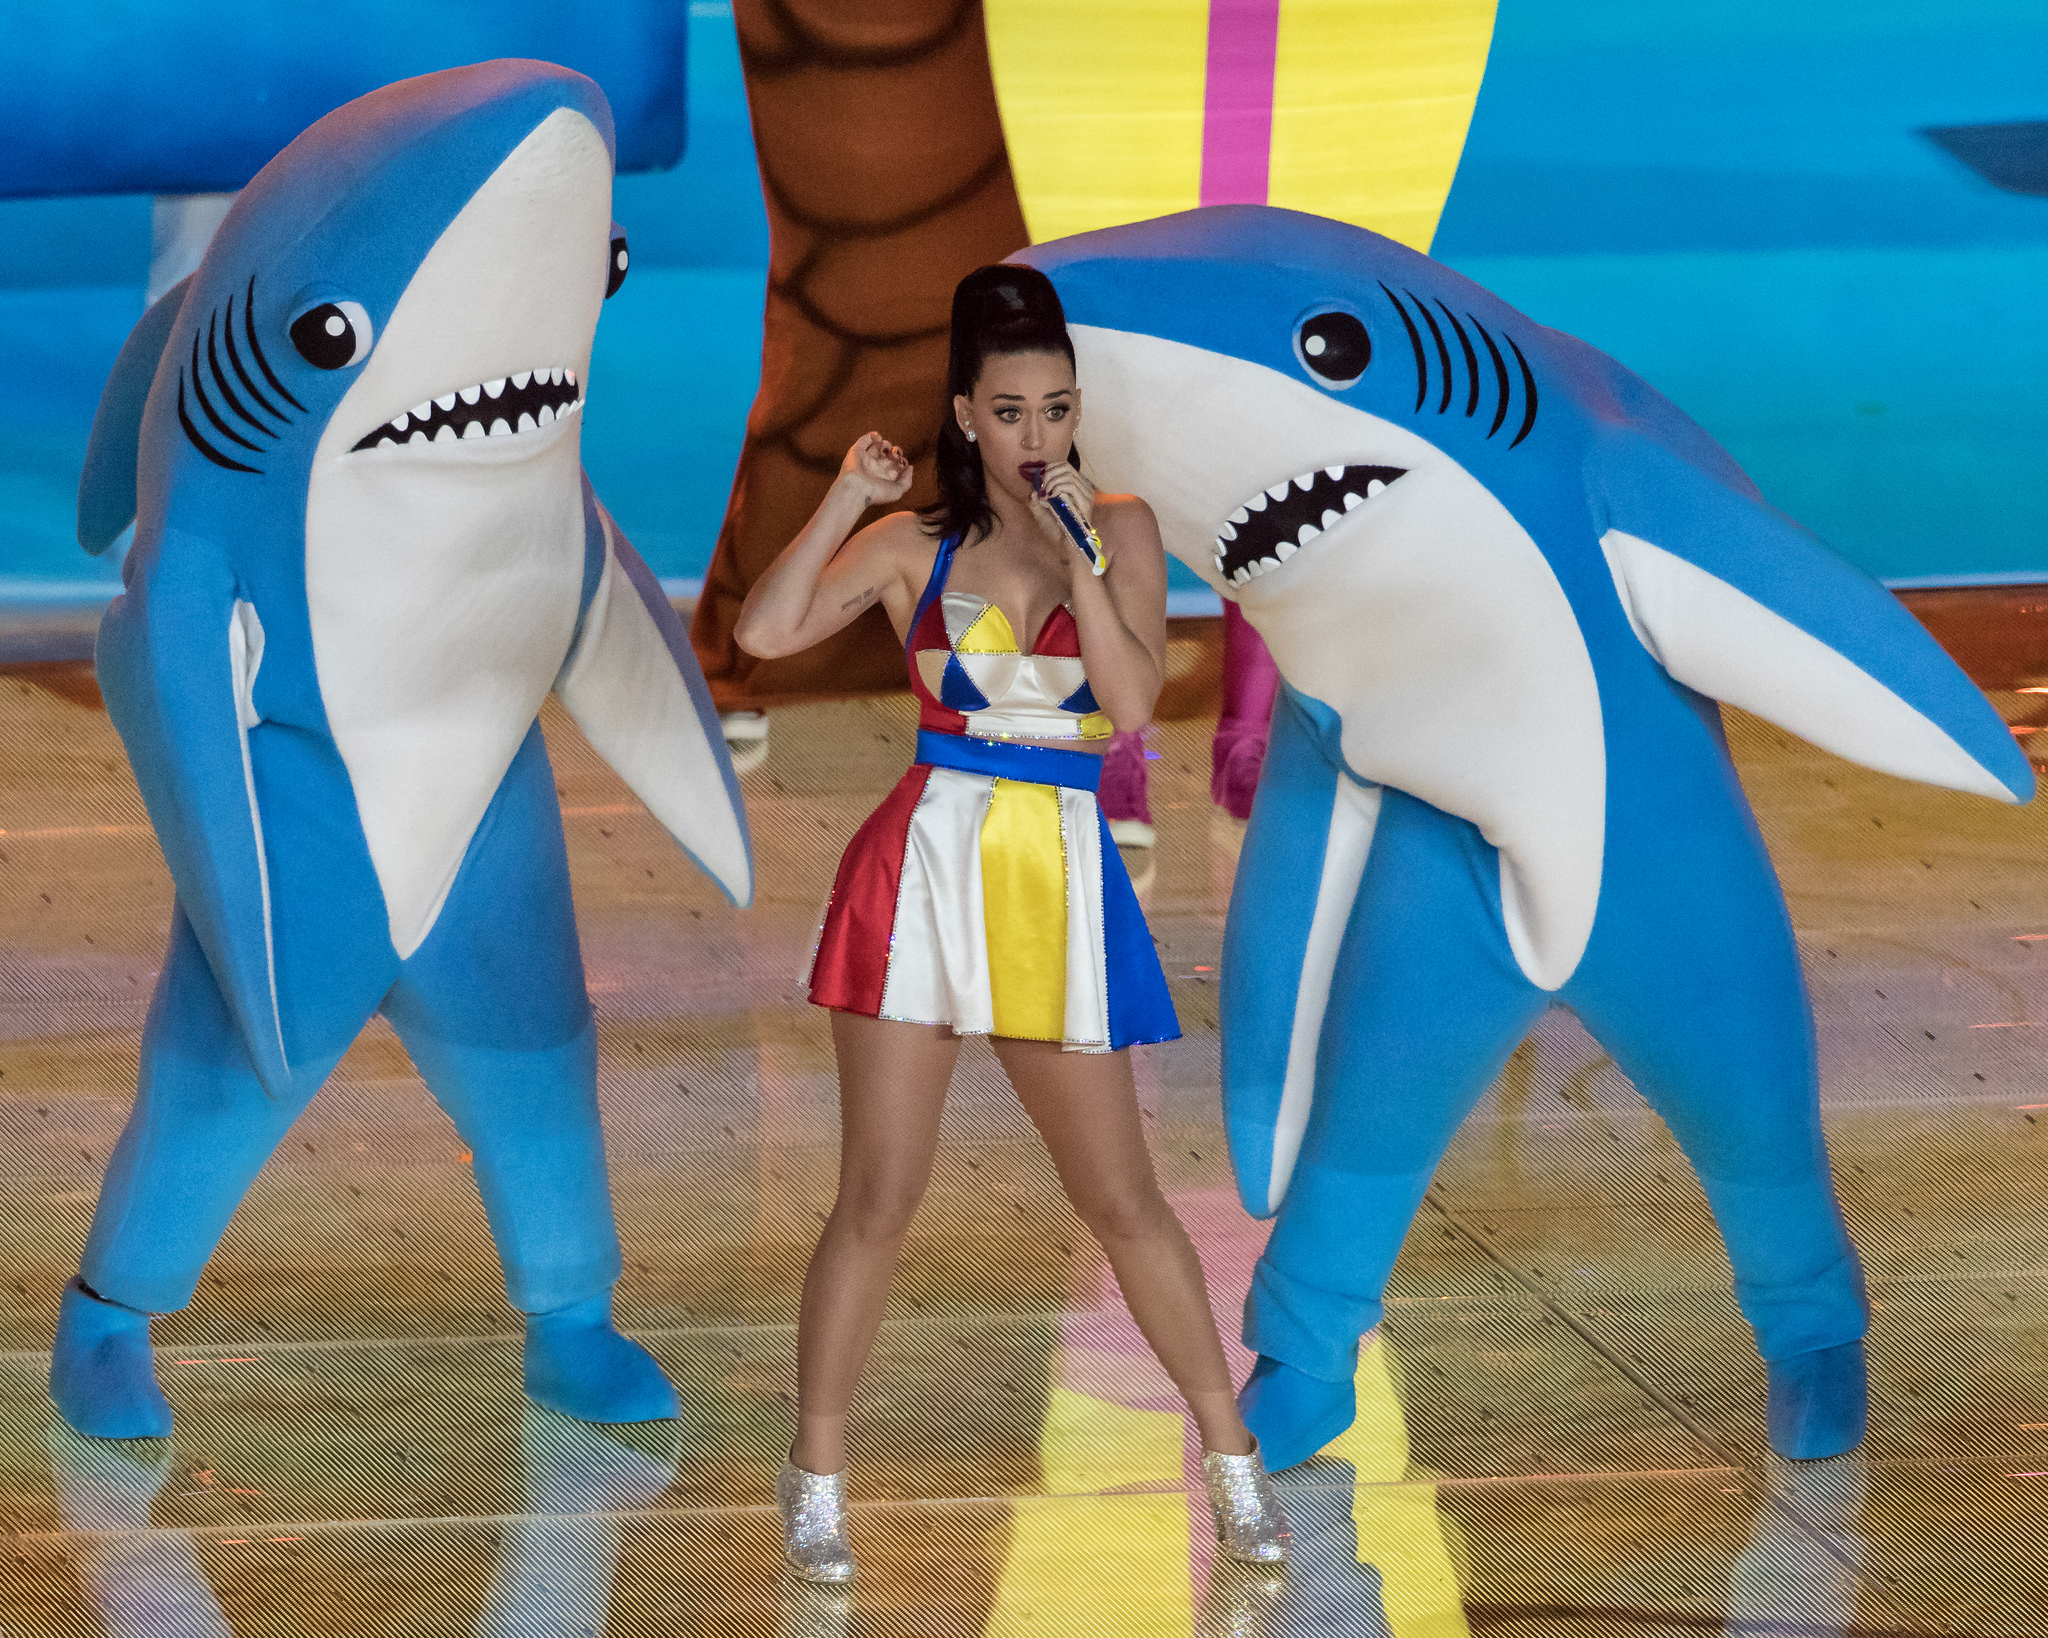

El tiburón izquierdo se roba el espectáculo. Katy Perry actuando en el descanso de la Super Bowl XLIX. Foto de Huntley Paton. Atribución-CompartirIgual 2.0 Genérico (CC BY-SA 2.0).

El conjunto de datos que utilizaremos se ha extraído y pulido de Wikipedia. Se compone de tres archivos CSV, uno con los datos del juego, otro con los datos de la televisión y otro con los datos de los músicos del descanso de las 52 Super Bowls hasta 2018. Vamos a echar un vistazo, utilizando display() en lugar de print() ya que su salida es mucho más bonita en Jupyter Notebooks.

In [1]:
# Importar pandas
import pandas as pd

# Cargar los datos CSV en DataFrames
super_bowls = pd.read_csv("datasets/super_bowls.csv")
tv = pd.read_csv("datasets/tv.csv")
halftime_musicians = pd.read_csv("datasets/halftime_musicians.csv")

# Mostrar las cinco primeras filas de cada DataFrame
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

date  super_bowl                          venue             city  \
0  2018-02-04          52              U.S. Bank Stadium      Minneapolis   
1  2017-02-05          51                    NRG Stadium          Houston   
2  2016-02-07          50                 Levi's Stadium      Santa Clara   
3  2015-02-01          49  University of Phoenix Stadium         Glendale   
4  2014-02-02          48                MetLife Stadium  East Rutherford   

        state  attendance           team_winner  winning_pts     qb_winner_1  \
0   Minnesota       67612   Philadelphia Eagles           41      Nick Foles   
1       Texas       70807  New England Patriots           34       Tom Brady   
2  California       71088        Denver Broncos           24  Peyton Manning   
3     Arizona       70288  New England Patriots           28       Tom Brady   
4  New Jersey       82529      Seattle Seahawks           43  Russell Wilson   

  qb_winner_2    coach_winner            team_loser  losing_pts  \
0         NaN   Doug Pederson  New England Patriots          33   
1         NaN  Bill Belichick       Atlanta Falcons          28   
2         NaN     Gary Kubiak     Carolina Panthers          10   
3         NaN  Bill Belichick      Seattle Seahawks          24   
4         NaN    Pete Carroll        Denver Broncos           8   

       qb_loser_1 qb_loser_2     coach_loser  combined_pts  difference_pts  
0       Tom Brady        NaN  Bill Belichick            74               8  
1       Matt Ryan        NaN       Dan Quinn            62               6  
2      Cam Newton        NaN      Ron Rivera            34              14  
3  Russell Wilson        NaN    Pete Carroll            52               4  
4  Peyton Manning        NaN        John Fox            51              35

super_bowl network  avg_us_viewers  total_us_viewers  rating_household  \
0          52     NBC       103390000               NaN              43.1   
1          51     Fox       111319000       172000000.0              45.3   
2          50     CBS       111864000       167000000.0              46.6   
3          49     NBC       114442000       168000000.0              47.5   
4          48     Fox       112191000       167000000.0              46.7   

   share_household  rating_18_49  share_18_49  ad_cost  
0               68          33.4         78.0  5000000  
1               73          37.1         79.0  5000000  
2               72          37.7         79.0  5000000  
3               71          39.1         79.0  4500000  
4               69          39.3         77.0  4000000

super_bowl                               musician  num_songs
0          52                      Justin Timberlake       11.0
1          52  University of Minnesota Marching Band        1.0
2          51                              Lady Gaga        7.0
3          50                               Coldplay        6.0
4          50                                Beyoncé        3.0

### 2. Tomar nota de los problemas del conjunto de datos

En cuanto a los datos del partido de la Super Bowl, podemos ver que el conjunto de datos parece completo, excepto por los valores que faltan en las columnas del quarterback suplente (qb_winner_2 y qb_loser_2), lo que tiene sentido dado que la mayoría de los QBs titulares en la Super Bowl (qb_winner_1 y qb_loser_1) juegan todo el partido.

A partir de la inspección visual de los datos de los músicos de la televisión y del descanso, sólo aparece un valor que falta, pero tengo la corazonada de que hay más. La Super Bowl se remonta a 1967, y las columnas más granulares (por ejemplo, el número de canciones de los encargados Wikipedia es estupenda, pero no es perfecta.

Una inspección de la salida de .info() para tv y halftime_musicians nos muestra que hay múltiples columnas con valores nulos.

In [2]:
# Resumen de los datos de TV a inspeccionar
tv.info()

print('\n')

# Resumen de los datos del músico de medio tiempo para inspeccionar
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: 

### 3. Distribución de puntos combinada

Para los datos de televisión, las siguientes columnas tienen valores perdidos, y muchos:

total_us_viewers (cantidad de espectadores estadounidenses que vieron al menos una parte de la emisión)
rating_18_49 (porcentaje medio de adultos estadounidenses de 18 a 49 años que viven en un hogar con televisión y que vieron toda la emisión)
share_18_49 (porcentaje medio de adultos estadounidenses de 18 a 49 años que viven en un hogar con un televisor en uso y que lo vieron durante toda la emisión)
En cuanto a los datos de los músicos del descanso, faltan los números de las canciones interpretadas (num_songs) en aproximadamente un tercio de las actuaciones.

Hay muchas razones posibles para estos valores perdidos. ¿Alguna vez se rastrearon los datos? ¿Se perdieron en la historia? ¿Merece la pena el esfuerzo de investigación para que estos datos estén completos? Tal vez. Ver todos los espectáculos del descanso de la Super Bowl para obtener el recuento de canciones sería muy divertido. Pero ahora no tenemos tiempo para hacer esas cosas. Tomemos nota de los puntos en los que el conjunto de datos no es perfecto y empecemos a descubrir algunas ideas.

Empecemos por ver los puntos combinados de cada Super Bowl visualizando la distribución. También vamos a señalar las Super Bowls con las puntuaciones más altas y más bajas.

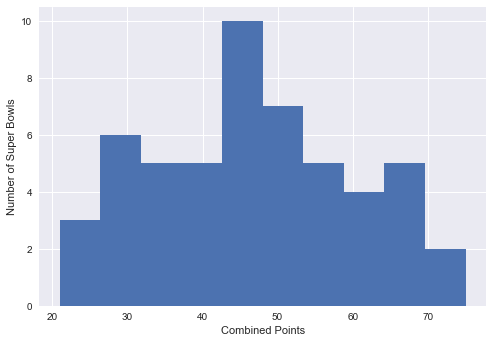

date  super_bowl               venue           city      state  \
0   2018-02-04          52   U.S. Bank Stadium    Minneapolis  Minnesota   
23  1995-01-29          29  Joe Robbie Stadium  Miami Gardens    Florida   

    attendance          team_winner  winning_pts  qb_winner_1 qb_winner_2  \
0        67612  Philadelphia Eagles           41   Nick Foles         NaN   
23       74107  San Francisco 49ers           49  Steve Young         NaN   

      coach_winner            team_loser  losing_pts      qb_loser_1  \
0    Doug Pederson  New England Patriots          33       Tom Brady   
23  George Seifert    San Diego Chargers          26  Stan Humphreys   

   qb_loser_2     coach_loser  combined_pts  difference_pts  
0         NaN  Bill Belichick            74               8  
23        NaN      Bobby Ross            75              23

date  super_bowl              venue         city       state  \
43  1975-01-12           9     Tulane Stadium  New Orleans   Louisiana   
45  1973-01-14           7  Memorial Coliseum  Los Angeles  California   
49  1969-01-12           3        Orange Bowl        Miami     Florida   

    attendance          team_winner  winning_pts     qb_winner_1 qb_winner_2  \
43       80997  Pittsburgh Steelers           16  Terry Bradshaw         NaN   
45       90182       Miami Dolphins           14      Bob Griese         NaN   
49       75389        New York Jets           16      Joe Namath         NaN   

   coach_winner           team_loser  losing_pts      qb_loser_1  \
43   Chuck Noll    Minnesota Vikings           6  Fran Tarkenton   
45    Don Shula  Washington Redskins           7     Bill Kilmer   
49  Weeb Ewbank      Baltimore Colts           7    Earl Morrall   

       qb_loser_2   coach_loser  combined_pts  difference_pts  
43            NaN     Bud Grant            22              10  
45            NaN  George Allen            21               7  
49  Johnny Unitas     Don Shula            23               9

In [3]:
# Importar matplotlib y establecer el estilo de trazado
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Trazar un histograma de puntos combinados
plt.hist(super_bowls.combined_pts)
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Mostrar las Super Bowls con los resultados combinados más altos y más bajos
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

### 4. Distribución de la diferencia de puntos

La mayoría de las puntuaciones combinadas se sitúan en torno a los 40-50 puntos, con los extremos a una distancia aproximadamente igual en direcciones opuestas. Subiendo a las puntuaciones combinadas más altas, a 74 y 75, encontramos dos partidos con actuaciones dominantes de los quarterbacks. Uno de ellos incluso ocurrió recientemente en la Super Bowl LII de 2018, donde los Patriots de Tom Brady perdieron ante los Eagles de Nick Foles, que no eran favoritos, por 41-33 para una puntuación combinada de 74.

Bajando a los puntajes combinados más bajos, tenemos el Super Bowl III y VII, que presentaron defensas duras que dominaron. También tenemos el Super Bowl IX en Nueva Orleans en 1975, cuyo resultado de 16-6 puede atribuirse a las inclemencias del tiempo. El campo estaba resbaladizo por la lluvia de la noche, y hacía un frío de 8 °C (46 °F), lo que dificultaba que los Steelers y los Vikings hicieran mucho en la ofensiva. Fue la segunda Super Bowl más fría de la historia y la última que se jugó con mal tiempo en más de 30 años. La NFL se dio cuenta de que a la gente le gustan los puntos, supongo.

ACTUALIZACIÓN: En la Super Bowl LIII de 2019, los Patriots y los Rams rompieron el récord de la Super Bowl con menos puntos, con una puntuación combinada de 16 puntos (13-3 para los Patriots).

Veamos ahora la diferencia de puntos.

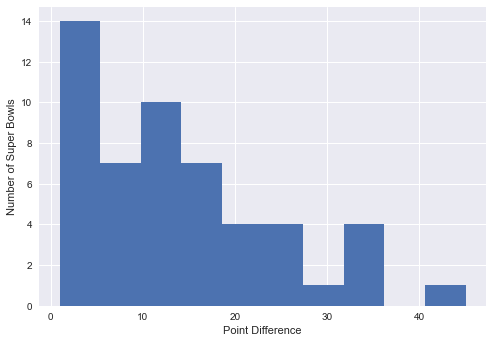

date  super_bowl          venue   city    state  attendance  \
27  1991-01-27          25  Tampa Stadium  Tampa  Florida       73813   

        team_winner  winning_pts     qb_winner_1 qb_winner_2   coach_winner  \
27  New York Giants           20  Jeff Hostetler         NaN  Bill Parcells   

       team_loser  losing_pts qb_loser_1 qb_loser_2 coach_loser  combined_pts  \
27  Buffalo Bills          19  Jim Kelly        NaN   Marv Levy            39   

    difference_pts  
27               1

date  super_bowl                venue             city       state  \
4   2014-02-02          48      MetLife Stadium  East Rutherford  New Jersey   
25  1993-01-31          27            Rose Bowl         Pasadena  California   
28  1990-01-28          24  Louisiana Superdome      New Orleans   Louisiana   
32  1986-01-26          20  Louisiana Superdome      New Orleans   Louisiana   

    attendance          team_winner  winning_pts     qb_winner_1 qb_winner_2  \
4        82529     Seattle Seahawks           43  Russell Wilson         NaN   
25       98374       Dallas Cowboys           52     Troy Aikman         NaN   
28       72919  San Francisco 49ers           55     Joe Montana         NaN   
32       73818        Chicago Bears           46     Jim McMahon         NaN   

      coach_winner            team_loser  losing_pts      qb_loser_1  \
4     Pete Carroll        Denver Broncos           8  Peyton Manning   
25   Jimmy Johnson         Buffalo Bills          17       Jim Kelly   
28  George Seifert        Denver Broncos          10      John Elway   
32      Mike Ditka  New England Patriots          10      Tony Eason   

      qb_loser_2    coach_loser  combined_pts  difference_pts  
4            NaN       John Fox            51              35  
25   Frank Reich      Marv Levy            69              35  
28           NaN     Dan Reeves            65              45  
32  Steve Grogan  Raymond Berry            56              36

In [4]:
# Traza un histograma de diferencias de puntos
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

# Muestra los partidos más cercanos y las mayores goleadas
display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['difference_pts'] >= 35])

### 5. ¿Las goleadas se traducen en pérdida de espectadores?

La gran mayoría de las Super Bowls son partidos ajustados. Tiene sentido. Es probable que ambos equipos lo merezcan si han llegado hasta aquí. El partido más reñido de la historia fue cuando los Buffalo Bills perdieron contra los New York Giants por un punto en 1991, recordado sobre todo por el intento de gol de campo fallado por Scott Norwood en el último segundo, que salió desviado hacia la derecha, dando inicio a cuatro derrotas consecutivas de los Bills en la Super Bowl. Pobre Scott. La mayor discrepancia de puntos de la historia fue de 45 puntos (¡!) cuando el miembro del Salón de la Fama Joe Montana llevó a los San Francisco 49ers a la victoria en 1990, un año antes del partido más reñido de la historia.

Recuerdo haber visto a los Seahawks aplastar a los Broncos por 35 puntos (43-8) en 2014, lo cual fue una experiencia aburrida en mi opinión. El juego nunca estuvo realmente cerca. Estoy bastante seguro de que cambiamos de canal al final del tercer cuarto. Combinemos nuestros datos de juego y de televisión para ver si se trata de un fenómeno universal. ¿Las grandes diferencias de puntos se traducen en pérdida de espectadores? Podemos trazar la cuota de hogares (porcentaje medio de hogares estadounidenses con un televisor en uso que estuvieron viendo toda la emisión) frente a la diferencia de puntos para averiguarlo.

<AxesSubplot:xlabel='difference_pts', ylabel='share_household'>

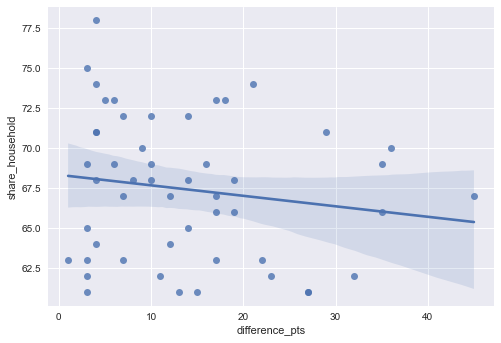

In [5]:
# Unir los datos del juego y de la TV, filtrando el SB I porque se dividió en dos redes
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Importar seaborn
import seaborn as sns

# Crear un gráfico de dispersión con un ajuste de modelo de regresión lineal
sns.regplot(x='difference_pts', y='share_household', data=games_tv)

### 6. La audiencia y la industria publicitaria a lo largo del tiempo

La línea de regresión descendente y el intervalo de confianza del 95% para esa regresión sugieren que es habitual abandonar el partido si es una goleada. Aunque coincide con nuestra intuición, debemos tomarlo con pinzas porque la relación lineal de los datos es débil debido al pequeño tamaño de la muestra de 52 partidos.

Sin embargo, independientemente del resultado, apuesto a que la mayoría de la gente aguanta hasta el espectáculo del descanso, lo que es una buena noticia para las cadenas de televisión y los anunciantes. Un anuncio de 30 segundos cuesta ahora unos bonitos 5 millones de dólares, pero ¿siempre ha sido así? ¿Y cómo ha evolucionado el número de espectadores y la audiencia en los hogares junto con el coste de los anuncios? Podemos averiguarlo utilizando gráficos de líneas que comparten un eje x de la "Super Bowl".

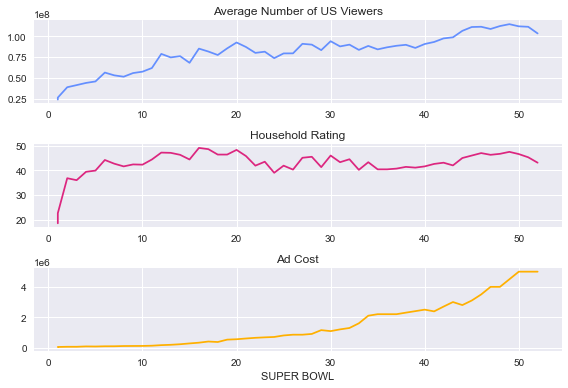

In [6]:
# Crear una figura con subplot 3x1 y activar el subplot superior
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#648FFF')
plt.title('Average Number of US Viewers')

# Activar la subtrama del medio
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color='#DC267F')
plt.title('Household Rating')


# Activa la subtrama inferior
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color='#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Mejorar el espacio entre las sub-parcelas
plt.tight_layout()

### 7. Los espectáculos de medio tiempo no siempre fueron tan buenos

Podemos ver que los espectadores aumentaron antes que los costes de los anuncios. ¿Quizá las cadenas no eran muy expertas en datos y tardaron en reaccionar? Tiene sentido, ya que DataCamp no existía entonces.

Otra hipótesis: ¿quizás los espectáculos de medio tiempo no eran tan buenos en los primeros años? El espectáculo moderno de la Super Bowl tiene mucho que ver con el prestigio cultural de las grandes actuaciones del descanso. Me metí en una madriguera de YouTube y resulta que los antiguos no estaban a la altura de los actuales. Algunos infractores:

- Super Bowl XXVI en 1992: Un rap de Frosty The Snowman interpretado por niños.
- Super Bowl XXIII en 1989: Un imitador de Elvis que hizo trucos de magia y ni siquiera cantó una canción de Elvis.
- Super Bowl XXI en 1987: Ponis bailando claqué. (Vale, eso es bastante impresionante en realidad).

Resulta que la actuación de Michael Jackson en la Super Bowl XXVII, uno de los eventos más vistos de la historia de la televisión estadounidense, fue el momento en el que la NFL se dio cuenta del valor del tiempo de emisión de la Super Bowl y decidió que tenía que contratar a artistas de renombre a partir de entonces. Los espectáculos de medio tiempo anteriores a MJ no eran tan impresionantes, lo que podemos comprobar filtrando nuestros datos de halftime_musician.

In [7]:
# Muestra todos los músicos del medio tiempo de las Super Bowls hasta la Super Bowl XXVII inclusive
halftime_musicians[halftime_musicians.super_bowl <= 27]

super_bowl                                           musician  num_songs
80           27                                    Michael Jackson        5.0
81           26                                     Gloria Estefan        2.0
82           26              University of Minnesota Marching Band        NaN
83           25                              New Kids on the Block        2.0
84           24                                      Pete Fountain        1.0
85           24                                       Doug Kershaw        1.0
86           24                                        Irma Thomas        1.0
87           24                    Pride of Nicholls Marching Band        NaN
88           24                                  The Human Jukebox        NaN
89           24                                  Pride of Acadiana        NaN
90           23                                       Elvis Presto        7.0
91           22                                     Chubby Checker        2.0
92           22         San Diego State University Marching Aztecs        NaN
93           22                                     Spirit of Troy        NaN
94           21     Grambling State University Tiger Marching Band        8.0
95           21                                     Spirit of Troy        8.0
96           20                                     Up with People        NaN
97           19                                       Tops In Blue        NaN
98           18  The University of Florida Fightin' Gator March...        7.0
99           18       The Florida State University Marching Chiefs        7.0
100          17  Los Angeles Unified School District All City H...        NaN
101          16                                     Up with People        NaN
102          15                                  The Human Jukebox        NaN
103          15                                    Helen O'Connell        NaN
104          14                                     Up with People        NaN
105          14     Grambling State University Tiger Marching Band        NaN
106          13                                       Ken Hamilton        NaN
107          13                                           Gramacks        NaN
108          12                   Tyler Junior College Apache Band        NaN
109          12                                      Pete Fountain        NaN
110          12                                            Al Hirt        NaN
111          11  Los Angeles Unified School District All City H...        NaN
112          10                                     Up with People        NaN
113           9                                   Mercer Ellington        NaN
114           9     Grambling State University Tiger Marching Band        NaN
115           8                  University of Texas Longhorn Band        NaN
116           8                                       Judy Mallett        NaN
117           7               University of Michigan Marching Band        NaN
118           7                                       Woody Herman        NaN
119           7                                      Andy Williams        NaN
120           6                                    Ella Fitzgerald        NaN
121           6                                     Carol Channing        NaN
122           6                                            Al Hirt        NaN
123           6      United States Air Force Academy Cadet Chorale        NaN
124           5             Southeast Missouri State Marching Band        NaN
125           4                                  Marguerite Piazza        NaN
126           4                                     Doc Severinsen        NaN
127           4                                            Al Hirt        NaN
128           4                                  The Human Jukebox        NaN
129           3           Florida A&M University Marching 100 Band        NaN
130           2     Grambli

### 8. ¿Quién tiene más apariciones en el espectáculo de medio tiempo?

Muchas bandas de música. El clarinetista de jazz estadounidense Pete Fountain. Miss Texas 1973 tocando el violín. No hay nada en contra de esos artistas, simplemente no son Beyoncé. Para ser justos, nadie lo es.

Veamos todos los músicos que han hecho más de un espectáculo de medio tiempo, incluyendo su número de actuaciones.

In [8]:
# Contar las apariciones en los espectáculos de medio tiempo de cada músico y ordenarlas de mayor a menor
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Mostrar los músicos con más de una aparición en el espectáculo de medio tiempo
halftime_appearances[halftime_appearances['super_bowl'] > 1]

musician  super_bowl
28      Grambling State University Tiger Marching Band           6
104                                     Up with People           4
1                                              Al Hirt           4
83                                   The Human Jukebox           3
76                                      Spirit of Troy           2
25            Florida A&M University Marching 100 Band           2
26                                      Gloria Estefan           2
102              University of Minnesota Marching Band           2
10                                          Bruno Mars           2
64                                       Pete Fountain           2
5                                              Beyoncé           2
36                                   Justin Timberlake           2
57                                               Nelly           2
44   Los Angeles Unified School District All City H...           2

### 9. ¿Quién ha interpretado más canciones en un espectáculo de medio tiempo?

La mundialmente famosa Grambling State University Tiger Marching Band se lleva la corona con seis apariciones. Beyoncé, Justin Timberlake, Nelly y Bruno Mars son los únicos músicos posteriores al año 2000 con múltiples apariciones (dos cada uno).

Según nuestras inspecciones anteriores, la columna num_songs tiene muchos valores perdidos:

- Muchas de las bandas de música no tienen entradas de num_songs.
- Para las bandas que no son de marcha, los datos que faltan comienzan a aparecer en la Super Bowl XX.

Vamos a filtrar las bandas de música filtrando los músicos con la palabra "Marching" y la palabra "Spirit" (una convención de nombres común para las bandas de música es "Spirit of [algo]"). A continuación, filtraremos las Super Bowls posteriores a la Super Bowl XX para solucionar el problema de los datos que faltan, y luego veremos quién tiene el mayor número de canciones.

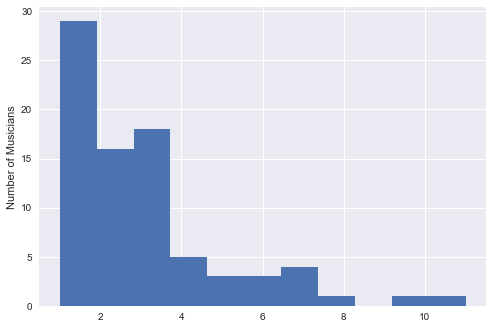

super_bowl             musician  num_songs
0           52    Justin Timberlake       11.0
70          30           Diana Ross       10.0
10          49           Katy Perry        8.0
2           51            Lady Gaga        7.0
90          23         Elvis Presto        7.0
33          41               Prince        7.0
16          47              Beyoncé        7.0
14          48           Bruno Mars        6.0
3           50             Coldplay        6.0
25          45  The Black Eyed Peas        6.0
20          46              Madonna        5.0
30          44              The Who        5.0
80          27      Michael Jackson        5.0
64          32      The Temptations        4.0
36          39       Paul McCartney        4.0

In [9]:
# Filtra la mayoría de las bandas de música
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Trazar un histograma del número de canciones por actuación
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)

plt.ylabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Ordena los músicos que no son de banda por número de canciones por aparición...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...y mostrar los 15 primeros
display(no_bands.head(15))

### 10. Conclusión

La mayoría de los músicos que no son de banda hacen de 1 a 3 canciones por espectáculo de medio tiempo. Es importante tener en cuenta que la duración del espectáculo del medio tiempo es fija (aproximadamente 12 minutos), por lo que las canciones por actuación es más una medida de cuántas canciones de éxito tienes. JT se salió en 2018, vaya. ¡11 canciones! Diana Ross está en segundo lugar con 10 en su medley en 1996.

En este cuaderno, cargamos, limpiamos y luego exploramos los datos del partido de la Super Bowl, la televisión y el espectáculo de medio tiempo. Hemos visualizado las distribuciones de los puntos combinados, las diferencias de puntos y las actuaciones del espectáculo de medio tiempo mediante histogramas. Usamos gráficos de líneas para ver cómo el aumento de los costes de la publicidad se retrasa con respecto al aumento de la audiencia. Y descubrimos que los reventones parecen provocar un descenso de los espectadores.

El Gran Juego de este año llegará antes de que te des cuenta. ¿Quién crees que ganará la Super Bowl LIII?

ACTUALIZACIÓN: Alerta de spoiler.

In [11]:
# Campeones de la conferencia 2018-2019
patriots = 'New England Patriots'
rams = 'Los Angeles Rams'

# ¿Quién ganará la Super Bowl LIII?
super_bowl_LIII_winner = patriots
print('The winner of Super Bowl LIII will be the / El ganador de la Super Bowl LIII será el', super_bowl_LIII_winner)

The winner of Super Bowl LIII will be the / El ganador de la Super Bowl LIII será el New England Patriots
